In [1]:
from datetime import datetime
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import aplpy

import warnings
warnings.filterwarnings("ignore")

/home/leo/miniconda3/envs/tfm/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
time_ini = datetime.now()

In [3]:
#images directory:
main_dir=f'observations/'

# Data sample:

In [4]:
#loading JADES data:
data_jades=main_dir+f'hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits'

#opening extension 9 (redshifts) and 2 (coordinates):
with fits.open(data_jades) as hdul:
    header=hdul[9].header
    data=hdul[9].data
    header_coord=hdul[2].header
    data_coord=hdul[2].data

In [5]:
num=[]
z=[]
z_chisq=[]
ra=[]
dec=[]

#selecting galaxies with a redshift>1:
for i in range(len(data)):
    if data['EAZY_z_a'][i]>1:
        num.append(data['ID'][i])
        z.append(data['EAZY_z_a'][i])
        z_chisq.append(data['EAZY_chisq_min'][i])
        ra.append(data_coord['RA'][i])
        dec.append(data_coord['DEC'][i])

#creating a new table with the relevant information:        
table=Table()
table['ID']=num
table['RA']=ra
table['DEC']=dec
table['z']=z
table['z chi squared']=z_chisq

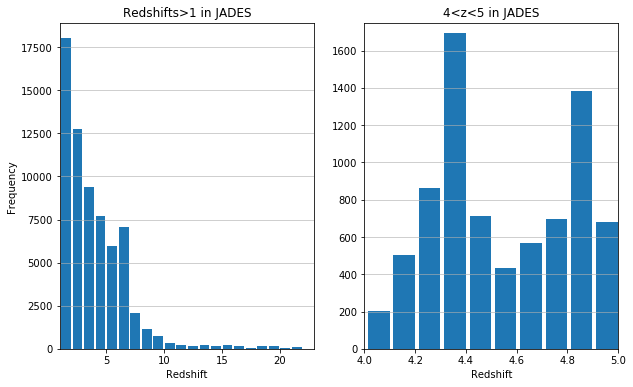

In [6]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

#histogram on all the data:
plot=ax1.hist(x=table['z'], bins=round(max(table['z']))-1, rwidth=0.85)
ax1.grid(axis='y', alpha=0.75)
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Frequency')
ax1.set_title('Redshifts>1 in JADES')
ax1.set_xlim(xmin=1)

#histogram on sample 4<z<5:
plot2=ax2.hist(x=table['z'], bins=10*(round(max(table['z']))-1), rwidth=0.85)
ax2.grid(axis='y', alpha=0.75)
ax2.set_xlabel('Redshift')
ax2.set_title('4<z<5 in JADES')
ax2.set_xlim(xmin=4,xmax=5)
ax2.set_ylim(ymax=1750)

plt.show()

# Detection of barred galaxies:

We start by selecting a sample of galaxies with redshifts between 4 and 5 in order to analyze bar fraction in a smaller sample.

In [7]:
num=[]
z=[]
z_chisq=[]
ra=[]
dec=[]

#selecting galaxies with 4<z<5:
for i in range(len(data)):
    if (data['EAZY_z_a'][i]>4) & (data['EAZY_z_a'][i]<5):
        num.append(data['ID'][i])
        z.append(data['EAZY_z_a'][i])
        z_chisq.append(data['EAZY_chisq_min'][i])
        ra.append(data_coord['RA'][i])
        dec.append(data_coord['DEC'][i])

#creating a new table with the relevant information:        
table_z=Table()
table_z['ID']=num
table_z['RA']=ra
table_z['DEC']=dec
table_z['z']=z
table_z['z chi squared']=z_chisq

print(f"There are {len(table_z)} galaxies with redshifts between 4 and 5.")

There are 7700 galaxies with redshifts between 4 and 5.


There are too many galaxies; in order to reduce sample data, we calculate 90th percentile for the minimum chi-square estimation for redshift and take only the remaining data.

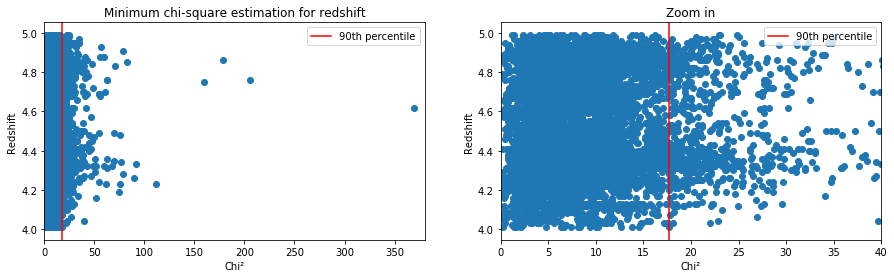

In [8]:
per_90=np.percentile(z_chisq, 90)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

ax1.scatter(z_chisq,z)
ax1.set_xlabel('Chi²')
ax1.set_ylabel('Redshift')
ax1.set_title('Minimum chi-square estimation for redshift')
ax1.set_xlim(xmin=0,xmax=380)
ax1.axvline(x=per_90, color='r', label='90th percentile')
ax1.legend(loc=1)

ax2.scatter(z_chisq,z)
ax2.set_xlabel('Chi²')
ax2.set_ylabel('Redshift')
ax2.set_title('Zoom in')
ax2.set_xlim(xmin=0,xmax=40)
ax2.axvline(x=per_90, color='r', label='90th percentile')
ax2.legend(loc=1)

plt.show()

In [9]:
num=[]
z=[]
z_chisq=[]
ra=[]
dec=[]

#selecting galaxies with 4<z<5:
for i in range(len(data)):
    if (data['EAZY_z_a'][i]>4) & (data['EAZY_z_a'][i]<5) & (data['EAZY_chisq_min'][i]>per_90):
        num.append(data['ID'][i])
        z.append(data['EAZY_z_a'][i])
        z_chisq.append(data['EAZY_chisq_min'][i])
        ra.append(data_coord['RA'][i])
        dec.append(data_coord['DEC'][i])

#creating a new table with the relevant information:        
table_z_best=Table()
table_z_best['ID']=num
table_z_best['RA']=ra
table_z_best['DEC']=dec
table_z_best['z']=z
table_z_best['z chi squared']=z_chisq

print(f"Now in the sample there are {len(table_z_best)} galaxies with redshifts between 4 and 5.")

Now in the sample there are 770 galaxies with redshifts between 4 and 5.


Representing an image to see how the data looks; we choose three filters: F090W, F200W and F444W. Effective responses for the filters are available here: https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-instrumentation/nircam-filters

In [10]:
#loading image from F090W NIRcam filter:
data_jades_f090w=main_dir+f'JWST_filters/hlsp_jades_jwst_nircam_goods-s-deep_f090w_v1.0_drz/hlsp_jades_jwst_nircam_goods-s-deep_f090w_v1.0_drz.fits'
hdu_list_f090w=fits.open(data_jades_f090w)

#loading image from F200W NIRcam filter:
data_jades_f200w=main_dir+f'JWST_filters/hlsp_jades_jwst_nircam_goods-s-deep_f200w_v1.0_drz/hlsp_jades_jwst_nircam_goods-s-deep_f200w_v1.0_drz.fits'
hdu_list_f200w=fits.open(data_jades_f200w)
    
#loading image from F444W NIRcam filter:
data_jades_f444w=main_dir+f'JWST_filters/hlsp_jades_jwst_nircam_goods-s-deep_f444w_v1.0_drz/hlsp_jades_jwst_nircam_goods-s-deep_f444w_v1.0_drz.fits'
hdu_list_f444w=fits.open(data_jades_f444w)

In [11]:
### One image:

# F = aplpy.FITSFigure(hdu_list_f090w[1], figsize=(10, 8))
#F.recenter(53.158, -27.781, width=0.002, height=0.002)
#F.show_colorscale(vmin=0,vmax=0.3,cmap='viridis')
#F.add_colorbar()

#F.tick_labels.set_xformat('hh:mm:ss.s')

### Two images:

#fig=plt.figure(figsize=(10,7))

#f_f090W=aplpy.FITSFigure(hdu_list_f090w[1], figure=fig, subplot=[0,0,0.5,0.5])
#f_f090W.recenter(53.158, -27.781, width=0.002, height=0.002)
#f_f090W.show_colorscale(vmin=0,vmax=0.3,cmap='viridis')
#f_f090W.add_colorbar()
#f_f090W.tick_labels.set_xformat('hh:mm:ss.s')
#f_f090W.set_title('F090W')

#f_f200W=aplpy.FITSFigure(hdu_list_f200w[1], figure=fig, subplot=[0.5,0,0.5,0.5])
#f_f200W.recenter(53.158, -27.781, width=0.002, height=0.002)
#f_f200W.show_colorscale(vmin=0,vmax=0.3,cmap='viridis')
#f_f200W.add_colorbar()
#f_f200W.tick_labels.set_xformat('hh:mm:ss.s')
#f_f200W.set_title('F200W')

#fig.canvas.draw()

In [12]:
time_end = datetime.now()
print(f"Initial time...: {time_ini}")
print(f"Final time.....: {time_end}")
print(f"Excecution time: {time_end-time_ini}")

Initial time...: 2023-11-23 16:10:40.883926
Final time.....: 2023-11-23 16:12:25.512902
Excecution time: 0:01:44.628976
